In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 1)
%matplotlib inline

In [40]:
attack_file = pd.read_csv('attacks.csv', encoding= "ISO-8859-1")
f = attack_file.copy()
orig_shape = attack_file.shape

In [41]:
f.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [42]:
f.shape

(25723, 24)

In [43]:
# Clean up column names

strip_dict = {}
for i,j in enumerate(f.columns):
    strip_dict[j] = j.strip()

f.rename(columns= strip_dict,inplace = True)
f.rename(columns={'Fatal (Y/N)':'Fatal','Investigator or Source':'Source'},inplace=True)

In [44]:
# identify high NaN lines and replace useless column
nun_nan = []

for fila in f.itertuples():
    
    check=[]
    
    for e in fila:
        
        check.append(pd.isna(e))
        
    nun_nan.append(sum(check))
f['Unnamed: 22'] = nun_nan
f.rename(columns={'Unnamed: 22':'NaN Columns'},inplace=True)


In [45]:
#identify nulls
nullity = pd.DataFrame([f.notna().sum(), f.isnull().sum()], ['Not Nulls','Nulls']).T
nullity.sort_values(by='Nulls',inplace=True)
nullity

,Not Nulls,Nulls
NaN Columns,25723,0
Case Number,8702,17021
original order,6309,19414
Date,6302,19421
Case Number.2,6302,19421
Case Number.1,6302,19421
href,6302,19421
pdf,6302,19421
href formula,6301,19422
Year,6300,19423


In [46]:
# eliminate NaN >10 rows
f.drop(index = f[f['NaN Columns']>10].index, inplace=True)
f.shape

(6302, 24)

In [47]:
# Identify strange years
f[['Year','Date','Time','Case Number']][f['Year'].isna()]
f[['Year','Date','Time','Case Number']][f['Year']<1500]

,Year,Date,Time,Case Number
6174,500.0,Circa 500 A.D.,NaN,0500.00.00
6175,77.0,77 A.D.,NaN,0077.00.00
6176,5.0,Ca. 5 A.D.,NaN,0005.00.00
6177,0.0,Ca. 214 B.C.,NaN,0.0214
6178,0.0,Ca. 336.B.C..,NaN,0.0336
...,...,...,...,...
6297,0.0,Before 1903,NaN,ND.0005
6298,0.0,Before 1903,NaN,ND.0004
6299,0.0,1900-1905,NaN,ND.0003
6300,0.0,1883-1889,NaN,ND.0002


In [48]:
#replace NaNs with correct digit
f.at[187,'Year'] = 2017
f.at[6079,'Year'] = 1836
print(f.iloc[187]['Year'],f.iloc[6079]['Year'])

#remove Non-well-defined years and unreliable
f.drop(index = f[f['Year']<1500].index,inplace = True)
print(f[['Year','Date','Time','Case Number']][(f['Year']<1500) | f['Year'].isna()])

2017.0 1836.0
Empty DataFrame
Columns: [Year, Date, Time, Case Number]
Index: []


In [49]:
#Explore Case Number
f[f['Case Number'].isna()] # 1 Nan that can be fixed
bad_index = f.index[f['Case Number'].isna()][0]
f.at[bad_index,'Case Number'] = '1905.09.05.R'

# find bad values
non_standard = []

for fila in f['Case Number']:
    try:
        nothing = re.findall('\d{4}.\d{2}.\d{2}',fila)[0]
    except:
        non_standard.append(fila,)

len(non_standard) # only 1 value

# correct bad case number index
bad_index = f['Case Number'].index[f['Case Number'] == non_standard[0]][0]
f.at[ bad_index , 'Case Number' ] = '1864.05.00'


In [50]:
# New date columns based on Case number
dates = []
for fila in f['Case Number']:
    dates.append(re.findall('(\d{4}).(\d{2}).(\d{2})?(.*)',fila))
new_years = []
new_months = []
new_days = []
extra = []

for date in dates:
    new_years.append(date[0][0])
    new_months.append(date[0][1])
    new_days.append(date[0][2])
    extra.append(date[0][3])


f['New Year'] = new_years
f['New Month'] = new_months
f['New Day'] = new_days
f['Notes'] = extra
f['DateConc'] = f['New Year'] + '-' + f['New Month'] + '-'+ f['New Day']



In [51]:
# Notes - Reporteds
f['Reported'] = np.where(f['Notes'].str.contains('R'),'Y','N')
f.shape

(6174, 30)

In [52]:
# Check for duplicates
f.duplicated().sum() == 0 # True, so now we can duplicate rows with several cases
f['Many'] = 0

g = pd.concat([f,f[f['Notes'] =='.a & b'],f[f['Notes'] =='.R.a & b']]) # Concatenate those which are duped within the row
g.reset_index(inplace=True,drop=True) #reset the index

# Count duplicates sequentially to identify separate cases
for i in range(len(g)):
    g.at[ i , 'Many' ] = g['DateConc'][(g['DateConc'].duplicated() == True) & (g.index <= i) & (g['DateConc'] == g['DateConc'][i])].count()+1



In [53]:
# find anomalies
g['New Month'].unique() # month = 94?
g['New Month'] = g['New Month'].replace('94','04')
g['New Day'].unique() # day = 38?
g['New Day'] = g['New Day'].replace('38','28')

In [54]:
# New case number is cleaner and identifies cases in same day
g['Case Number'] = g['New Year'] + '.' + g['New Month'] + '.' + g['New Day'] + ', ' + g['Many'].astype(str)


In [55]:

g.loc[(g['New Day'] != '00'),'Approx Day'] = g['New Day']
g.loc[(g['New Day'] == '00'),'Approx Day'] = '01'
g.loc[(g['New Month'] != '00'),'Approx Month'] = g['New Month']
g.loc[(g['New Month'] == '00'),'Approx Month'] = '01'
# Create new date Column
g['Date Approx'] = pd.to_datetime(g['Approx Day'] +'-'+g['Approx Month']+'-'+g['New Year'], infer_datetime_format=True,errors='coerce')
g.drop(g[g['Date Approx'].isna()].index,inplace=True) # Remove really low dates that pandas doesnt accept
g.shape


(6166, 34)

In [56]:
g[g['New Month'] == '00'].count() # 391 entries don't have a definite month and values range wildly, so will delete
g.drop(g[g['New Month'] == '00'].index,inplace=True)
g.shape
g[g['New Day'] == '00'].count() #346 entries but could still be useful

Case Number       346
Date              346
Year              346
Type              346
Country           339
Area              294
Location          280
Activity          297
Name              320
Sex               278
Age                88
Injury            343
Fatal             313
Time               48
Species           168
Source            345
pdf               346
href formula      346
href              346
Case Number.1     346
Case Number.2     346
original order    346
NaN Columns       346
Unnamed: 23         0
New Year          346
New Month         346
New Day           346
Notes             346
DateConc          346
Reported          346
Many              346
Approx Day        346
Approx Month      346
Date Approx       346
dtype: int64

In [57]:
# Year column has no bad values
for i in g.Year:
    try:
        i = int(i)
    except:
        print(i)


In [58]:
# small test to check if years actually coincide

g['test column'] = 0
for i in range(len(g)):
    g['test column'] = int(g['New Year'].iloc[i]) - int(g['Year'].iloc[i])
g['test column'].unique() # only 0, so works, can now remove test column

# Change Date column to approximate Date column which contains the proper values with "reported" removed and added 1 to every unknown day
# Remove excess year/month/day columns



g.drop(columns=['test column','New Year','Date','Unnamed: 23', 'Approx Day','Approx Month','DateConc','Notes','New Day','New Month'], axis=1,inplace=True) 
g.rename(columns={'Date Approx':'Date'},inplace=True)

In [59]:
# Clean up the rest of the columns
for i in g.columns:
    try:
        g[i] = g[i].str.strip()
    except:
        continue


In [60]:
# Clean up Age column to get rid of uncertain ages

for i in range(len(g)):
    try:
        x = int(g['Age'].iloc[i])
        if x == 0:
            g.at[i, 'Age'] = np.nan
        else:
            g.at[i, 'Age'] = x
        
    except:
        g.at[i, 'Age'] = np.nan
g.drop(index = g[g['Age'] == '2½'].index,inplace = True)

g['Age'].isna().sum()

2740

In [61]:
# Clean up Sex column to get rid of uncertain sexes
g['Sex'].unique()
for i in g[(g['Sex'] != 'F') & (g['Sex'] != 'M')].index:

    g.at[i, 'Sex'] = np.nan


In [62]:
# clean up NaNs, empty rows, and number types

g.drop(g[g['Case Number'].isna()].index,inplace=True) 


g['Age'].fillna(0,inplace=True)
g['Age']=g['Age'].apply(pd.to_numeric, errors='coerce')
g['Year']=g['Year'].apply(pd.to_numeric, errors='coerce')
g.astype({'Age':'int','Year':'int'})

g.fillna('Unknown',inplace=True)

# Clean up types
for i in g[g['Type'] == 'Boat'].index:
    g.at[i,'Type'] = 'Boating'

g.at[g[g['Type'] == 'Boatomg'].index[0],'Type'] = 'Boating'

g.drop(g[(g['Type'] == 'Invalid') | (g['Type'] == 'Questionable')].index, inplace=True)


# Clean up Fatal
for i in g[g['Fatal'] == 'UNKNOWN'].index:
    g.at[i,'Fatal'] = 'Unknown'
for i in g[g['Fatal'] == 'M'].index:
    g.at[i,'Fatal'] = 'N'
for i in g[g['Fatal'] == 'y'].index:
    g.at[i,'Fatal'] = 'Y'
g.drop(g[(g['Fatal'] == '2017')].index, inplace=True)

g.reset_index(inplace=True)

In [63]:
# Clean up activity
g['Activity_clean'] = 'Other'

for i in range(len(g['Activity'])):
    x = re.findall("fishing", g.at[i,'Activity'], flags=re.I)
    if len(x)>0:
        g.at[i,'Activity_clean'] = 'Fishing'

for i in range(len(g['Activity'])):
    x = re.findall(".*surf.* | .*body.* | .*board.* | .*paddl.*", g.at[i,'Activity'], flags=re.I)
    if len(x)>0:
        g.at[i,'Activity_clean'] = 'Surfing'

for i in range(len(g['Activity'])):
    x = re.findall(".*diving.* | .*dive.* | .*snork.* | .*swim.* | .*wading.* | .*bathing.* | .*floating.* | .*washing.*", g.at[i,'Activity'], flags=re.I)
    if len(x)>0:
        g.at[i,'Activity_clean'] = 'Swimming'

for i in range(len(g['Activity'])):
    x = re.findall(".*kayak.* | .*canoe.* | .*owing.* | .*jet.* | .*raft.* | .*dinghy.* | .*catamaran.*", g.at[i,'Activity'], flags=re.I)
    if len(x)>0:
        g.at[i,'Activity_clean'] = 'Small vessel'

for i in range(len(g['Activity'])):
    x = re.findall(".*plane.* | .*disaster.* | .*capsize.* | .*explode.* | .*fire.* | .*sank.* | .*sink.* | .*wreck.* | .*torpedo.* | .*crash.* | .*ounder.*", g.at[i,'Activity'], flags=re.I)
    if len(x)>0:
        g.at[i,'Activity_clean'] = 'Disaster'


g['Activity_clean'].value_counts()

Other           3807
Fishing          908
Swimming         213
Surfing          147
Disaster         126
Small vessel      61
Name: Activity_clean, dtype: int64

In [64]:
g.to_csv('cleaned.csv',index=False)

### Analysis

In [65]:
h = g.copy()
h.head()


,index,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,NaN Columns,Reported,Many,Date,Activity_clean
0,0,"2018.06.25, 1",2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2.0,N,1.0,2018-06-25,Other
1,1,"2018.06.18, 1",2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,3.0,N,1.0,2018-06-18,Other
2,3,"2018.06.08, 1",2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,4.0,N,1.0,2018-06-08,Other
3,4,"2018.06.04, 1",2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,4.0,N,1.0,2018-06-04,Other
4,5,"2018.06.03, 1",2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,0,"No injury, board bitten",N,Unknown,Unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,5.0,N,1.0,2018-06-03,Other


In [66]:
#How does type of attack correlate with Sex

k = h.pivot_table(index=['Sex'], columns={'Type'},aggfunc={'Type':'count'})['Type']
k.drop(columns = 'Unknown',inplace= True)
k['Total'] = 0
for i in k.columns[k.columns != 'Total']:
    k['Total'] += k[i]


for i in k.columns[k.columns != 'Total']:
    k['%' + i] = 100*k[i]/k['Total']

# display
k_disp = k[['Total','Provoked','%Provoked','Unprovoked','%Unprovoked','Boating','%Boating','Sea Disaster','%Sea Disaster']][k.index != 'Unknown']
k_dispT = k_disp.T

# add calculated rows
k_dispT['Total'] = 0 
for i in k_dispT.columns[(k_dispT.columns != 'Total') ]:
    k_dispT['Total'] += k_dispT[i]
for i in k_dispT.columns[(k_dispT.columns != 'Total')& ~(k_dispT.columns.str.contains('%'))]:
    k_dispT['%' + i] = 100*k_dispT[i]/k_dispT['Total']
# Remove non-sensical values
for i in k_dispT.index:
    if '%' in i:
        k_dispT.at[i,'Total'] = pd.NA
k_disp = k_dispT.T
for i in k_disp.columns:
    if '%' in i:
        k_disp.at['%F',i] = pd.NA
        k_disp.at['%M',i] = pd.NA

k_disp



Type,Total,Provoked,%Provoked,Unprovoked,%Unprovoked,Boating,%Boating,Sea Disaster,%Sea Disaster
Sex,,,,,,,,,
F,536.0,22.0,4.1,497.0,92.7,9.0,1.7,8.0,1.5
M,4281.0,464.0,10.8,3558.0,83.1,110.0,2.6,149.0,3.5
Total,4817.0,486.0,<NA>,4055.0,<NA>,119.0,<NA>,157.0,<NA>
%F,11.1,4.5,<NA>,12.3,<NA>,7.6,<NA>,5.1,<NA>
%M,88.9,95.5,<NA>,87.7,<NA>,92.4,<NA>,94.9,<NA>


In [67]:
# Men are far more likely to get attacked by a shark
print('Women attack percentage of total: ','%.1f' % (k_disp.at['F','Total']*100 / k_disp.at['Total','Total']),'%')
print('Men attack percentage of total: ','%.1f' % (k_disp.at['M','Total']*100 / k_disp.at['Total','Total']),'%')
print('\n')

# Women are less likely to provoke a shark, and have more unprovoked accidents
print('Women provoked attack percentage: ','%.1f' % (k_disp.at['F','%Provoked']),'%')
print('Men provoked attack percentage: ','%.1f' % (k_disp.at['M','%Provoked']),'%')
print('\n')

# Men are more likely to have been in sea disasters and boating accidents
print('Women boating/disaster percentage: ','%.1f' % (k_disp.at['F','%Boating']+k_disp.at['F','%Sea Disaster']),'%')
print('Men boating/disaster percentage: ','%.1f' % (k_disp.at['M','%Boating']+k_disp.at['M','%Sea Disaster']),'%')



Women attack percentage of total:  11.1 %
Men attack percentage of total:  88.9 %


Women provoked attack percentage:  4.1 %
Men provoked attack percentage:  10.8 %


Women boating/disaster percentage:  3.2 %
Men boating/disaster percentage:  6.0 %


In [68]:
# Let's look at type of attack through the years

#bin function to control our output
def bins(size,minyear,maxyear):
    bin =[minyear]
    while minyear<maxyear:
        minyear += size
        bin.append(minyear)
    return bin

# Output table depending on what values we wish to see
def type_by_year(size=50,minyear=1700,maxyear=2019):
    

    groups = h.groupby([pd.cut(h['Year'], bins(size,minyear,maxyear)), 'Type'])
    l = groups.size().unstack(fill_value=0)
    l.drop(columns = 'Unknown',inplace= True)
    l['Total'] = 0
    for i in l.columns[l.columns != 'Total']:
        l['Total'] += l[i]

    for i in l.columns[l.columns != 'Total']:
        l['%' + i] = 100*l[i]/l['Total']
    return l

In [69]:
type_by_year(50,1800)
# Sea disaster is declining
# Amount of attacks (or number of reports) is steadily increasing
# Amount of provoked attacks peaked in the 20th century and is decreasing

Type,Boating,Provoked,Sea Disaster,Unprovoked,Total,%Boating,%Provoked,%Sea Disaster,%Unprovoked
Year,,,,,,,,,
"(1800, 1850]",3,2,6,68,79,3.8,2.5,7.6,86.1
"(1850, 1900]",18,25,36,276,355,5.1,7.0,10.1,77.7
"(1900, 1950]",60,103,85,628,876,6.8,11.8,9.7,71.7
"(1950, 2000]",129,256,79,1663,2127,6.1,12.0,3.7,78.2
"(2000, 2050]",100,155,15,1535,1805,5.5,8.6,0.8,85.0


In [70]:
type_by_year(3,1960,1990)
# There is an increase in provoked attacks in the 1970s, but a decrease in total attacks.
# The release of the Jaws movies could be a factor (1975, 1978).

Type,Boating,Provoked,Sea Disaster,Unprovoked,Total,%Boating,%Provoked,%Sea Disaster,%Unprovoked
Year,,,,,,,,,
"(1960, 1963]",21,49,7,121,198,10.6,24.7,3.5,61.1
"(1963, 1966]",11,19,9,106,145,7.6,13.1,6.2,73.1
"(1966, 1969]",2,29,4,70,105,1.9,27.6,3.8,66.7
"(1969, 1972]",0,9,4,75,88,0.0,10.2,4.5,85.2
"(1972, 1975]",5,7,6,84,102,4.9,6.9,5.9,82.4
"(1975, 1978]",11,7,8,52,78,14.1,9.0,10.3,66.7
"(1978, 1981]",2,10,4,79,95,2.1,10.5,4.2,83.2
"(1981, 1984]",3,7,4,92,106,2.8,6.6,3.8,86.8
"(1984, 1987]",5,9,3,77,94,5.3,9.6,3.2,81.9


<AxesSubplot: >

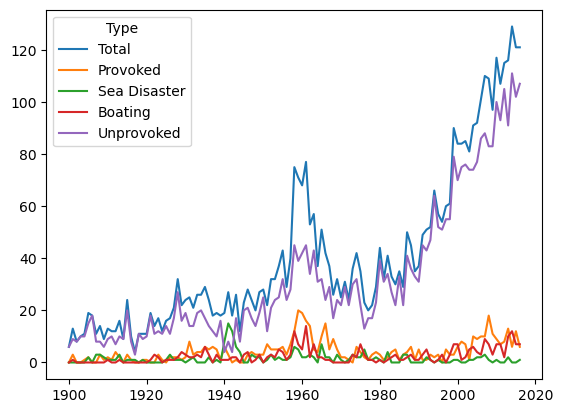

In [91]:
L = type_by_year(1,1900,2017)
L = L[['Total','Provoked','Sea Disaster','Boating','Unprovoked']]
L.reset_index(inplace=True)
x = {i : bins(1,1900,2017)[i] for i in range(len(bins(1,1900,2017)))}

L.rename(index = x,inplace=True)
L.plot()

In [ ]:
# Let's see how Fatalities correlate

k = h.pivot_table(index=['Sex'], columns={'Fatal'},aggfunc={'Fatal':'count'})['Fatal']
k.drop(columns = 'Unknown',inplace= True)
k

Fatal,N,Y
Sex,,
F,440,94
M,3255,1000
Unknown,322,93


In [ ]:
print('24 % of male attacks were fatal, while only 18 % of females did.')
print('Not significant enough to reach a conclusion')

24 % of male attacks were fatal, while only 18 % of females did.
Not significant enough to reach a conclusion


In [ ]:
# Let's look at fatality of attack through the years

# Output table depending on what values we wish to see
def fatal_by_year(size=50,minyear=1700,maxyear=2019):
    

    groups = h.groupby([pd.cut(h['Year'], bins(size,minyear,maxyear)), 'Fatal'])
    l = groups.size().unstack(fill_value=0)
    l.drop(columns = 'Unknown',inplace= True)
    l['Total'] = 0
    for i in l.columns[l.columns != 'Total']:
        l['Total'] += l[i]

    for i in l.columns[l.columns != 'Total']:
        l['%' + i] = 100*l[i]/l['Total']
    return l

In [ ]:
fatal_by_year(50,1800)
# Fatality steadily decreases as time progresses

NameError: name 'fatal_by_year' is not defined

In [ ]:
# Let's see how Activities correlate

k = h.pivot_table(index=['Sex'], columns={'Activity_clean'},aggfunc={'Activity_clean':'count'})['Activity_clean']
k.drop(index='Unknown',inplace=True)
k
# Nothing interesting

Activity_clean,Disaster,Fishing,Other,Small vessel,Surfing,Swimming
Sex,,,,,,
F,3,18,488,3,11,13
M,98,736,3065,54,133,199


In [ ]:
k = h.pivot_table(index=['Fatal'], columns={'Activity_clean'},aggfunc={'Activity_clean':'count'})['Activity_clean']
k.drop(index='Unknown',inplace=True)
k

Activity_clean,Disaster,Fishing,Other,Small vessel,Surfing,Swimming
Fatal,,,,,,
N,34.0,785.0,2894.0,44.0,113.0,147.0
Y,91.0,116.0,863.0,17.0,34.0,66.0


In [ ]:
k['Total'] = 0
for i in k.columns[k.columns != 'Total']:
    k['Total'] += k[i]


for i in k.columns[k.columns != 'Total']:
    k['%' + i] = 100*k[i]/k['Total']
k
# To do: fix regex for fewer Others

Activity_clean,Disaster,Fishing,Other,Small vessel,Surfing,Swimming,Total,%Disaster,%Fishing,%Other,%Small vessel,%Surfing,%Swimming
Fatal,,,,,,,,,,,,,
N,34.0,785.0,2894.0,44.0,113.0,147.0,4017.0,0.8,19.5,72.0,1.1,2.8,3.7
Y,91.0,116.0,863.0,17.0,34.0,66.0,1187.0,7.7,9.8,72.7,1.4,2.9,5.6
